In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
X = df.iloc[:, :-1]

y = df.iloc[:, -1]




## Splitting & Using GB


In [4]:
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold


gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X,y)

k_folds = 5

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

cross_val_results = cross_val_score(gradient_boosting, X, y, cv=kf)

print(f"Cross-Validation Results: {cross_val_results}")
print(f"Mean Accuracy: {cross_val_results.mean():.2f}")


Cross-Validation Results: [0.94835681 0.95058824 0.92705882 0.93647059 0.97411765]
Mean Accuracy: 0.95


## Using Evaluation Metrics

Leave-One-Out CV Accuracy: 99.10630291627469 %
Precision (macro) = 0.9895734845553922
Recall (macro) = 0.9825742834665463
F1-score (macro) = 0.9860469213189913


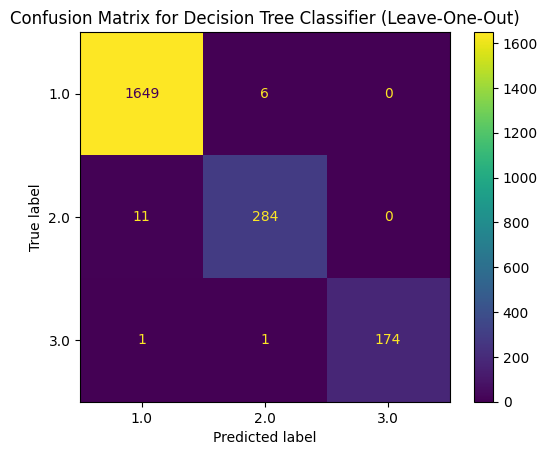

Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99      1655
         2.0       0.98      0.96      0.97       295
         3.0       1.00      0.99      0.99       176

    accuracy                           0.99      2126
   macro avg       0.99      0.98      0.99      2126
weighted avg       0.99      0.99      0.99      2126



In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)


accuracy = accuracy_score(y, gradient_boosting.predict(X))

precision = precision_score(y, gradient_boosting.predict(X), average='macro')
recall = recall_score(y, gradient_boosting.predict(X), average='macro')
f1 = f1_score(y, gradient_boosting.predict(X), average='macro')
print("Leave-One-Out CV Accuracy:", accuracy * 100, "%")

print("Precision (macro) =", precision)
print("Recall (macro) =", recall)
print("F1-score (macro) =", f1)


conf_matrix = confusion_matrix(y, gradient_boosting.predict(X))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for Decision Tree Classifier (Leave-One-Out)')
plt.show()

class_report = classification_report(y, gradient_boosting.predict(X))
print("Classification Report:")
print(class_report)

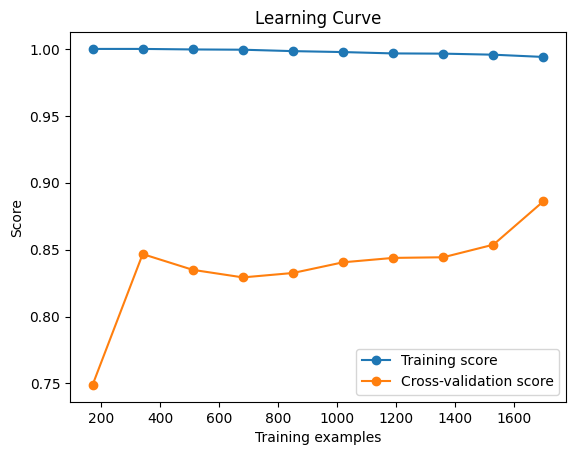

In [6]:
train_sizes, train_scores, test_scores = learning_curve(gradient_boosting, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

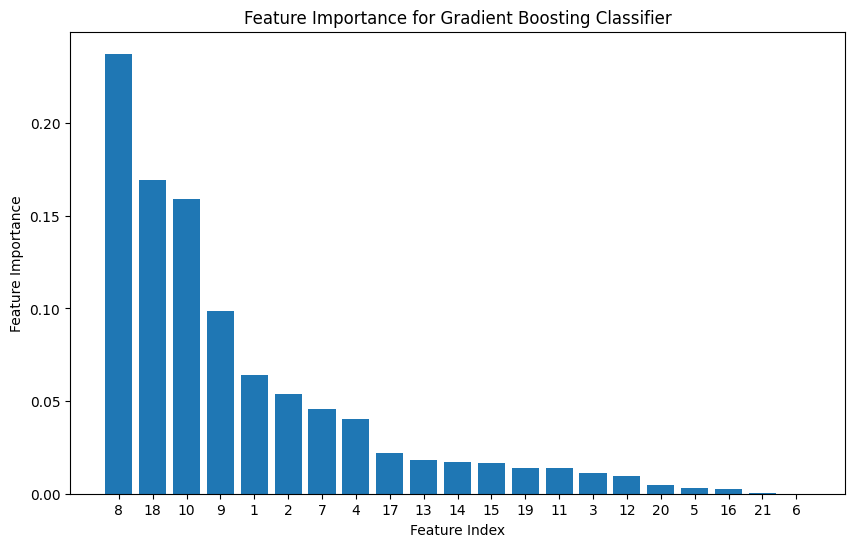

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_classifier.fit(X_train, y_train)

feature_importances = gb_classifier.feature_importances_

sorted_features_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_features_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xticks(range(X.shape[1]), sorted_features_indices + 1)  # Adding 1 to make indices start from 1
plt.show()


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


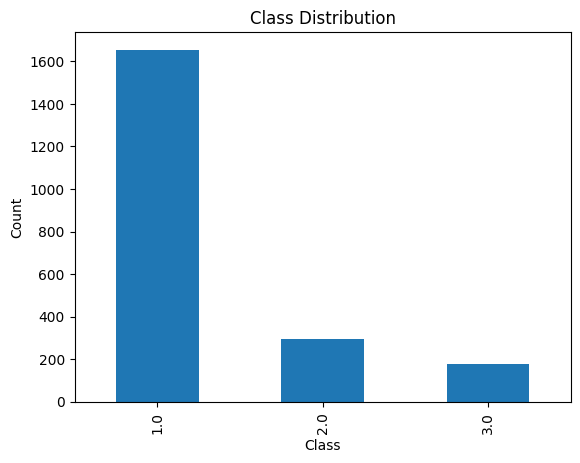

In [8]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Class Distribution:
fetal_health
1.0    1322
2.0    1322
3.0    1322
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


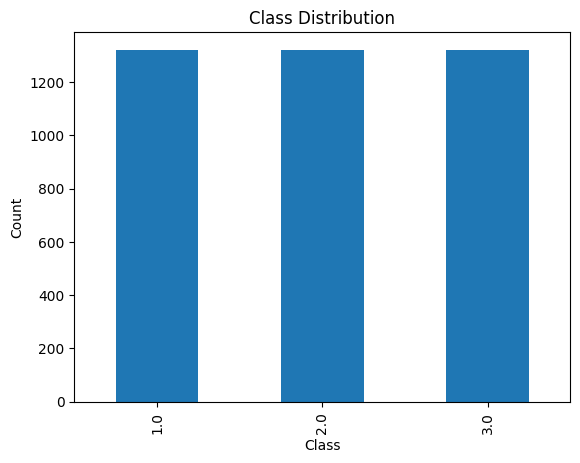

In [10]:
y_resampled_series = pd.Series(y_resampled)

# Calculate and plot class distribution
class_distribution = y_resampled_series.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using GB

In [11]:


from sklearn.model_selection import cross_val_score, KFold
gradient_boosting_after = GradientBoostingClassifier()
gradient_boosting_after.fit(X_resampled, y_resampled)


k_folds = 5 

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)


y_pred_after = cross_val_predict(gradient_boosting_after, X_resampled, y_resampled, cv=kf)



## Using Evaluation Metrics

Accuracy: 96.87342410489158 %
Precision (macro) = 0.9934692486791527
Recall (macro) = 0.9934442763489661
F1-score (macro) = 0.9934470489498964


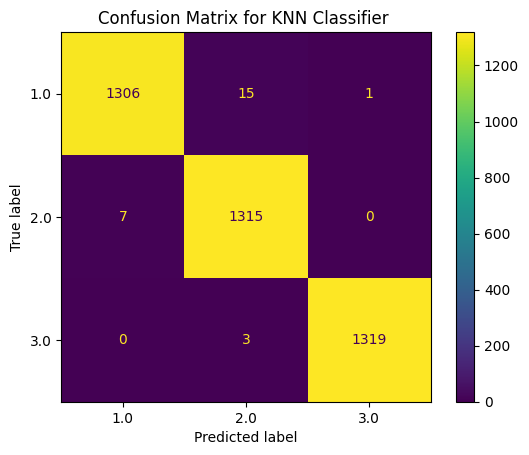

Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      1322
         2.0       0.99      0.99      0.99      1322
         3.0       1.00      1.00      1.00      1322

    accuracy                           0.99      3966
   macro avg       0.99      0.99      0.99      3966
weighted avg       0.99      0.99      0.99      3966



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


accuracy = accuracy_score(y_resampled, y_pred_after)
print("Accuracy:", accuracy * 100, "%")

precision = precision_score(y_resampled, gradient_boosting_after.predict(X_resampled), average='macro')
recall = recall_score(y_resampled, gradient_boosting_after.predict(X_resampled), average='macro')
f1 = f1_score(y_resampled, gradient_boosting_after.predict(X_resampled), average='macro')
print("Precision (macro) =", precision)
print("Recall (macro) =", recall)
print("F1-score (macro) =", f1)


conf_matrix = confusion_matrix(y_resampled, gradient_boosting_after.predict(X_resampled))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN Classifier ')
plt.show()
class_report = classification_report(y_resampled, gradient_boosting_after.predict(X_resampled))
print("Classification Report:")
print(class_report)



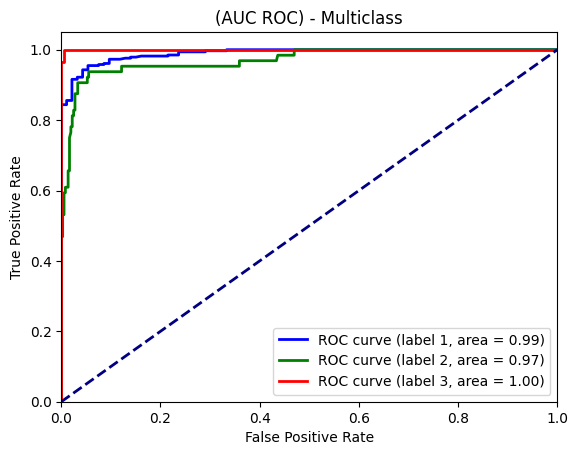

In [13]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = gradient_boosting_after.predict_proba(X_test)


plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


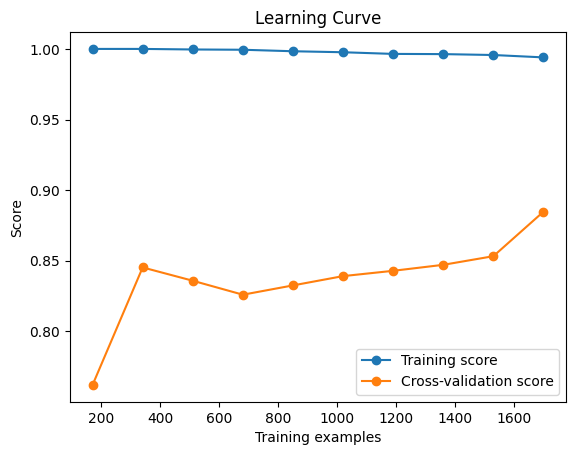

In [14]:
train_sizes, train_scores, test_scores = learning_curve(gradient_boosting_after, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

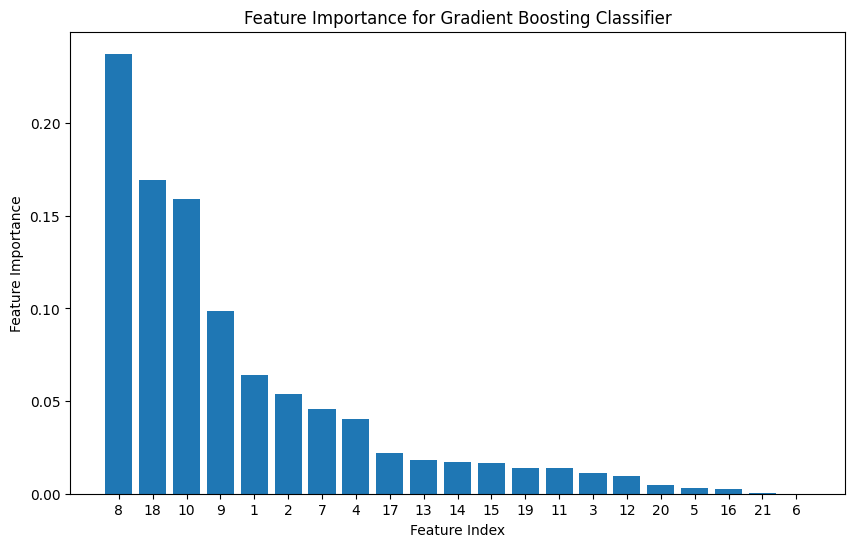

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_classifier.fit(X_train, y_train)

feature_importances = gb_classifier.feature_importances_

sorted_features_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_features_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xticks(range(X.shape[1]), sorted_features_indices + 1)  # Adding 1 to make indices start from 1
plt.show()
